# COVID-19 Analysis

My workbook for importing data from the UK government COVID-19 data API

## Import stuff

In [1]:
from uk_covid19 import Cov19API
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## Load data using UK Government COVID-19 data API

In [3]:
#england_only = ['areaType=nation','areaName=England']

none = ['areaType=overview']

cases_and_deaths = {
    "date":"date",
    "areaName":"areaName",
    "areaCode":"areaCode",
    "CasesByPublishDate":"newCasesByPublishDate",
    "CasesBySpecimenDate":"newCasesBySpecimenDate",
    "DeathsByDeathDate":"newDeaths28DaysByDeathDate",
    
}

api = Cov19API(filters=none, structure=cases_and_deaths)
data = api.get_json()  # Returns a dictionary

data_df = pd.DataFrame(data['data'])  # Change to dataframe
data_df = data_df.set_index('date').sort_index().reset_index()
data_df['date'] = pd.to_datetime(data_df['date'])

data_df["CasesByPublishDateRollingMean"] = data_df["CasesByPublishDate"].rolling(7).mean()

In [4]:
print('Last update: {0}'.format(data['lastUpdate']))
data_df

Last update: 2021-12-14T16:00:11.000000Z


,date,areaName,areaCode,CasesByPublishDate,CasesBySpecimenDate,DeathsByDeathDate,CasesByPublishDateRollingMean
0,2020-01-30,United Kingdom,K02000001,NaN,2.0,NaN,NaN
1,2020-01-31,United Kingdom,K02000001,2.0,0.0,NaN,NaN
2,2020-02-01,United Kingdom,K02000001,0.0,0.0,NaN,NaN
3,2020-02-02,United Kingdom,K02000001,0.0,0.0,NaN,NaN
4,2020-02-03,United Kingdom,K02000001,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
680,2021-12-10,United Kingdom,K02000001,58194.0,49029.0,62.0,49199.000000
681,2021-12-11,United Kingdom,K02000001,54073.0,43192.0,53.0,50802.571429
682,2021-12-12,United Kingdom,K02000001,48854.0,42142.0,57.0,51497.142857
683,2021-12-13,United Kingdom,K02000001,54661.0,NaN,21.0,51954.571429


## Plot cases

(0.0, 85548.75)

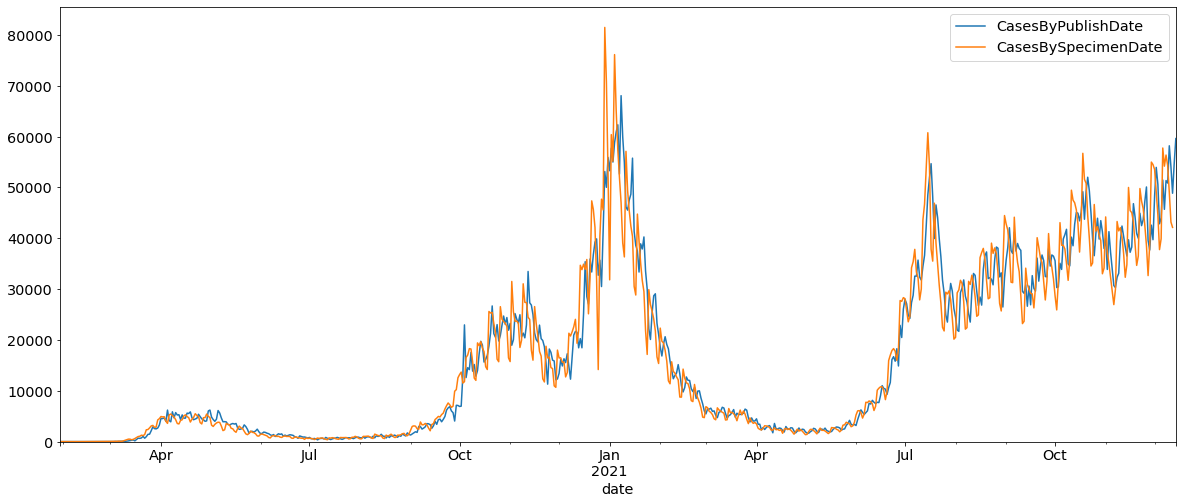

In [5]:
fig, ax = plt.subplots(1, 1)
    
plt1 = data_df.plot(x='date', y='CasesByPublishDate', ax=ax)
plt2 = data_df.plot(x='date', y='CasesBySpecimenDate', ax=ax)

plt1.set_ylim(0)
plt2.set_ylim(0)

## Plot rolling 7 day sum cases

(0.0, 71455.65)

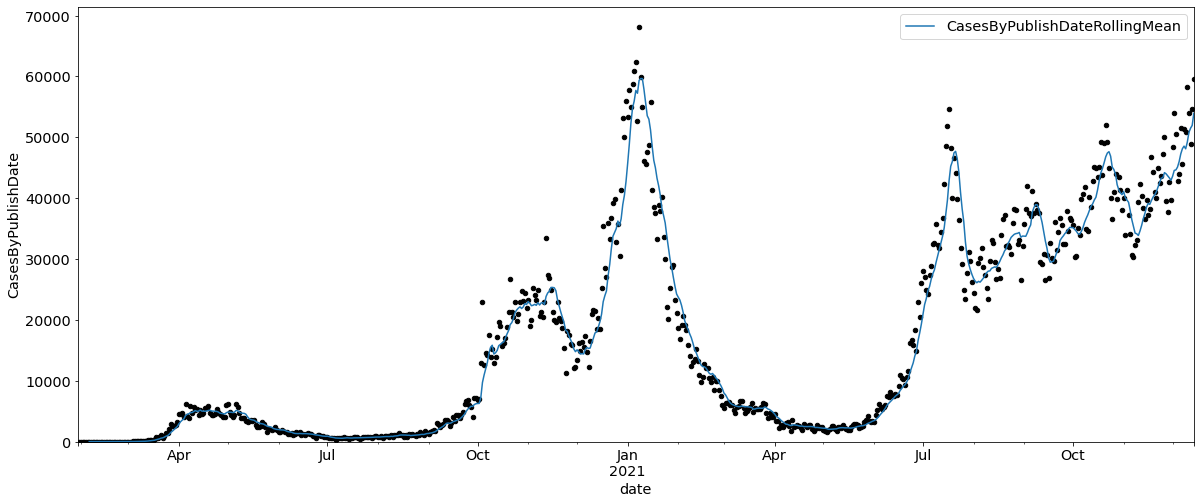

In [6]:
fig, ax = plt.subplots(1, 1)
    
plt1 = data_df.plot(x='date', y="CasesByPublishDateRollingMean", ax=ax)
plt2 = data_df.plot(kind='scatter', x='date', y='CasesByPublishDate', c='k', ax=ax)

plt1.set_ylim(0)
plt2.set_ylim(0)

## Plot cases and deaths

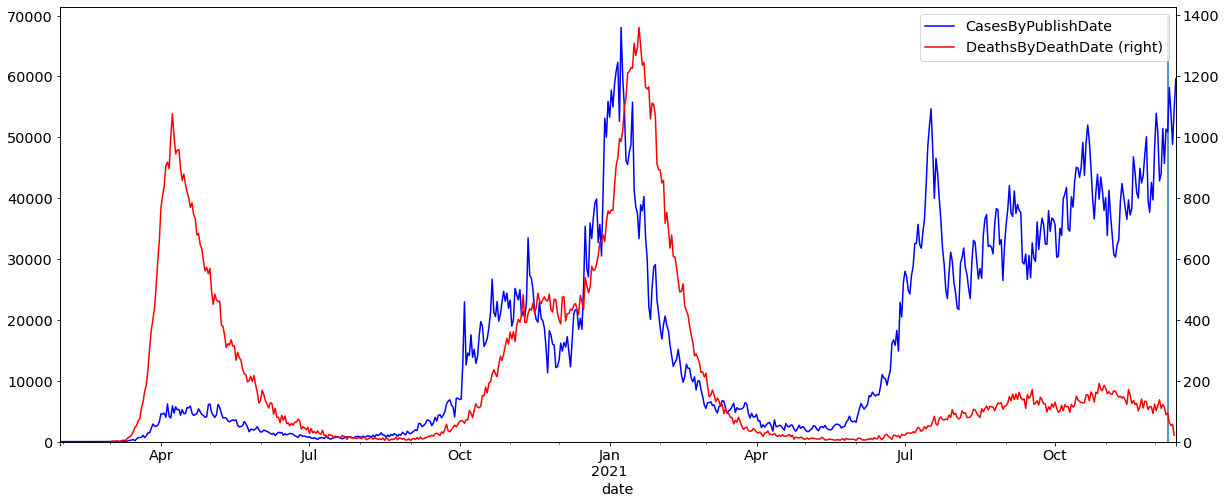

In [7]:
fig, ax = plt.subplots(1, 1)
    
plt1 = data_df.plot(x='date', y='CasesByPublishDate', ax=ax, c='b')
plt2 = data_df.plot(x='date', y='DeathsByDeathDate', ax=ax, c='r', secondary_y=True)

plt1.set_ylim(0)
plt2.set_ylim(0)

ax.vlines(data_df['date'].iloc[-6], ymin=0, ymax=70000)

## Shift deaths

In [8]:
lag = 12
data_df['DeathsByDeathDateShifted'] = data_df['DeathsByDeathDate'].shift(-lag)

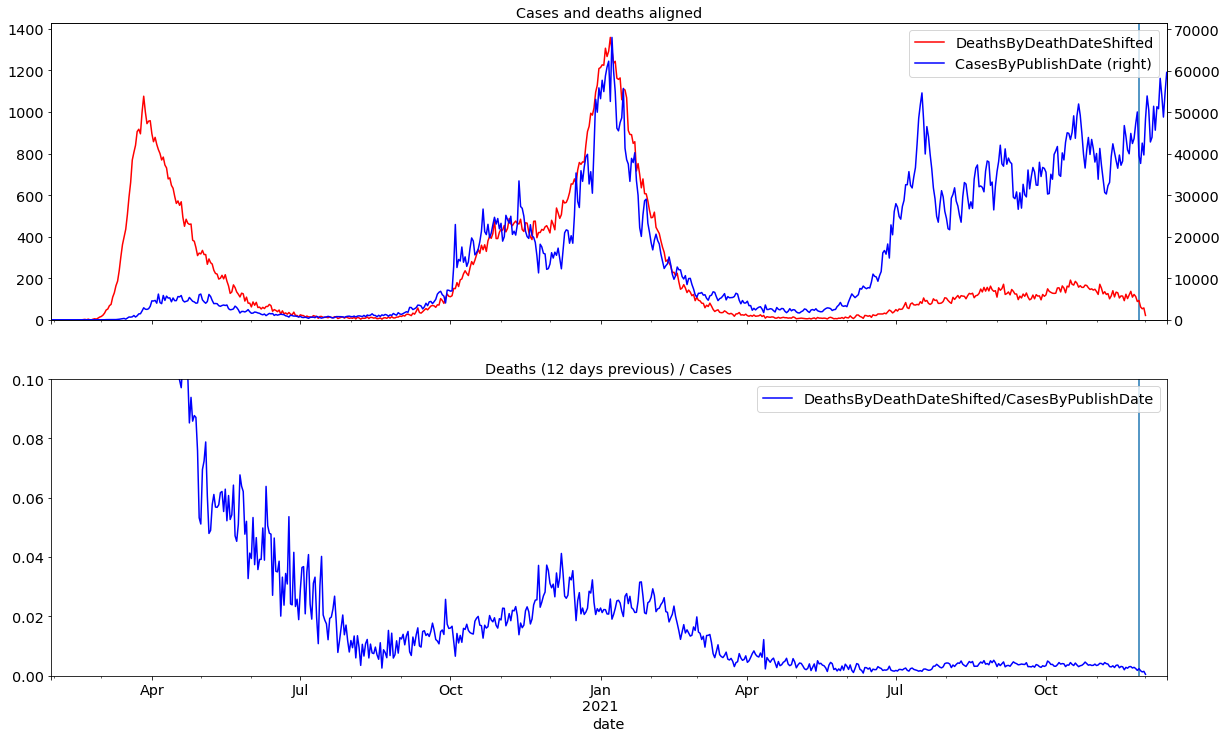

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(20, 12))

ax1.set_xlim(np.min(data_df['date']), np.max(data_df['date']))

ax1.set_title('Cases and deaths aligned')

plt1 = data_df.plot(x='date', y='DeathsByDeathDateShifted', ax=ax1, c='r')
plt2 = data_df.plot(x='date', y='CasesByPublishDate', ax=ax1, c='b', secondary_y=True)

plt1.set_ylim(0)
plt2.set_ylim(0)

data_df['DeathsByDeathDateShifted/CasesByPublishDate'] = data_df['DeathsByDeathDateShifted'] / data_df['CasesByPublishDate']

plt3 = data_df.plot(x='date', y='DeathsByDeathDateShifted/CasesByPublishDate', ax=ax2, c='b')
plt3.set_ylim(0, 0.1)
plt3.set_title('Deaths ({0} days previous) / Cases'.format(int(lag)))

ax1.vlines(data_df['date'].iloc[-6-lag], ymin=0, ymax=70000)
ax2.vlines(data_df['date'].iloc[-6-lag], ymin=0, ymax=70000)